In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline  
from matplotlib.font_manager import FontProperties

In [ ]:
def find_routes_with_ten_readings(df, route_numbers, min_num_readings=10, verbose=False):
    routes = []
    
    for number in route_numbers:
        route_df = df[df['route_number'] == number]
        
        if len(route_df) >= min_num_readings:
            routes.append(route_df)
        elif verbose:
            print('Route: ', number, ' only has ', len(route_df), ' readings!')
    
    print('Found', len(routes), 'routes that have', min_num_readings, 'or more readings')
    
    return pd.concat(routes)

def load_csv_as_df(file_name, sub_directories, column_numbers=None, column_names=None):
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name

    if column_numbers is not None:
        df = pd.read_csv(full_path, usecols=column_numbers)
    else:
        df = pd.read_csv(full_path)

    if column_names is not None:
        df.columns = column_names
    
    route_ids = df['route_number'].unique()
    return find_routes_with_ten_readings(df, route_ids, min_num_readings=10)

In [ ]:
def load_google_map_dfs():
    
    dfs = []
    column_names = ['latitude', 
                    'longitude',
                    'cell', 
                    'row', 
                    'column']
                    
    file_names = ['North-Train-To-West-Left-Google-Maps-Route-Cells.csv',
                  'North-Train-To-West-Middle-Google-Maps-Route-Cells.csv',
                  'West-Train-To-North-Bottom-Google-Maps-Route-Cells.csv',
                  'West-Train-To-North-Middle-Google-Maps-Route-Cells.csv',
                  'West-Train-To-North-Top-Google-Maps-Route-Cells.csv'
                  ]

    for file_name in file_names:
        df = pd.read_csv( file_name)
        # df.columns = column_names
        dfs.append(df)

    return dfs

In [ ]:
north_to_west_routes_df = load_csv_as_df('north-to-west-routes-with-cells.csv', '/')
west_to_north_routes_df = load_csv_as_df('west-to-north-routes-with-cells.csv', '/')

Found 196 routes that have 10 or more readings
Found 283 routes that have 10 or more readings


What is Rstrip in Python?
The rstrip() method returns a copy of the string by removing the trailing characters specified as argument

In [ ]:
def get_suspected_fraud_by_time_distance(df,text_file_name):
  f=open(text_file_name,"r")
  fraud_number=[line.rstrip() for line in f]
  f.close()
  return df[df['route_number'].isin(fraud_number)]


In [ ]:
north_fraud=get_suspected_fraud_by_time_distance(north_to_west_routes_df,'North_to_West_Suspected_Fraud_By_Time_Distance.txt')
print(len(north_fraud["route_number"].unique()))

0


In [ ]:
west_fraud=get_suspected_fraud_by_time_distance(west_to_north_routes_df,'West_to_North_Suspected_Fraud_By_Time_Distance.txt')
print(len(west_fraud["route_number"].unique()))

78


In [ ]:
google_maps_routes=load_google_map_dfs()

In [ ]:
def graph_google_map_routes(dfs,title,one_color=False,return_plot=False,label=None):
  color_count=1
  color_codes=map('C{}'.format,cycle(range(50)))

  added_label=False

  for df in dfs:
    long=df["longitude"].tolist()
    lat=df["latitude"].tolist()
    color_code=next(color_codes)

    if one_color:
      if label is  not None and not add_label:
        plt.plot(long,lat,color="g",label=label)
        add_label=True
      else:
        plt.plot(long,lat,color="g",label=label)
    else:
      plt.plot(long,lat,color=color_code)
      color_count+=1

  plt.title(title)
  plt.xlabel('')
  plt.ylabel('')
  frame1 = plt.gca()
  frame1.axes.xaxis.set_ticklabels([])
  frame1.axes.yaxis.set_ticklabels([])

  if return_plot:
    return plt
  plt.savefig(title+".png")
  plt.show()


In [ ]:
def add_route_to_plot(plot, route_df, color='r', label=None, verbose=False):
    long = route_df['longitude'].tolist()
    lat = route_df['latitude'].tolist()

    route_number = route_df['route_number'].unique()

    if verbose:
        print('Added route ', route_number[0], ' with color ', '\'', color, '\'')

    if label is not None:
        plot.plot(long, lat, color=color, label=label)
    else:
        plot.plot(long, lat, color=color)

    return plot


def add_routes_to_plot(plot, df):
    route_numbers = df['route_number'].unique()

    for route_number in route_numbers:
        if route_number != 599942 and route_number != 572818:
            route_data = df[df['route_number'] == route_number]

            long = route_data['longitude'].tolist()
            lat = route_data['latitude'].tolist()

            plot.plot(long, lat, color='r')
        else:
            print('NOT PRINTING ROUTE ', route_number)

    return plot
def plot_actual_routes_with_google_maps_routes(google_map_dfs, title, route_df):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    plot = add_routes_to_plot(plot, route_df)

    plot.savefig(title + '.png')
    plot.show()

# ***Graph All Google Map Routes***

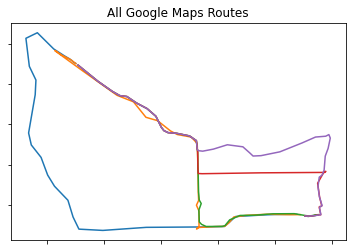

In [ ]:
graph_google_map_routes(google_maps_routes, 'All Google Maps Routes')

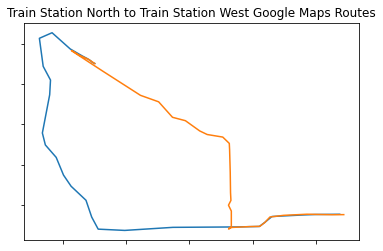

In [ ]:
graph_google_map_routes(google_maps_routes[:2], 'Train Station North to Train Station West Google Maps Routes')

# ***Plot North to West vs Google Maps***

In [ ]:
north_to_west_google_maps_routes_df = google_maps_routes[:2]
west_to_north_google_maps_routes_df = google_maps_routes[2:]

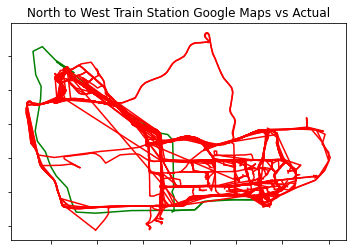

In [ ]:
plot_actual_routes_with_google_maps_routes(north_to_west_google_maps_routes_df, 
                                           'North to West Train Station Google Maps vs Actual', 
                                           north_to_west_routes_df)

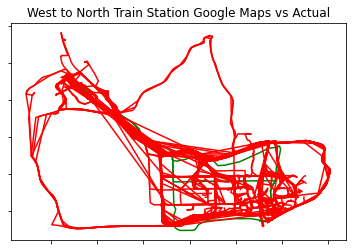

In [ ]:
plot_actual_routes_with_google_maps_routes(west_to_north_google_maps_routes_df, 
                                           'West to North Train Station Google Maps vs Actual', 
                                           west_to_north_routes_df)

In [ ]:
def plot_suspected_fraud_vs_google_maps(google_map_dfs, route_number, df, title, show=True):
    plot = graph_google_map_routes(google_map_dfs, title, one_color=True, return_plot=True)

    route_df = df[df['route_number'] == route_number]
    # print('Route ', route_number, ' has ', len(route_df), ' readings!')

    plot = add_route_to_plot(plot, route_df)
    plot.savefig(title + '.png')

    if show:
        plot.show()
    else:
        plot.clf()
        

def graph_all_routes_against_google_maps(df, google_maps_dfs, north_to_west=True):
    route_numbers = df['route_number'].unique()
    
    print('Creatings ', len(route_numbers), ' graphs!')

    for route_number in route_numbers:
        if north_to_west:
            plot_title = 'North to West Train Route ' + str(route_number)
        else:
            plot_title = 'West to North Train Route ' + str(route_number)

        plot_suspected_fraud_vs_google_maps(google_maps_dfs, route_number, df, plot_title, show=False)

    print('Done creating route graphs!')
    return

In [ ]:
graph_all_routes_against_google_maps(north_fraud,
                                     north_to_west_google_maps_routes_df,
                                     north_to_west=True)

Creatings  0  graphs!
Done creating route graphs!


In [ ]:
graph_all_routes_against_google_maps(north_to_west_routes_df,
                                     north_to_west_google_maps_routes_df,
                                     north_to_west=True)

Creatings  196  graphs!
Done creating route graphs!


<Figure size 432x288 with 0 Axes>

In [ ]:
graph_all_routes_against_google_maps(west_fraud,
                                     west_to_north_google_maps_routes_df,
                                     north_to_west=False)

Creatings  78  graphs!
Done creating route graphs!


<Figure size 432x288 with 0 Axes>

In [ ]:
graph_all_routes_against_google_maps(west_to_north_routes_df,
                                     west_to_north_google_maps_routes_df,
                                     north_to_west=False)

Creatings  283  graphs!
Done creating route graphs!


<Figure size 432x288 with 0 Axes>